In [62]:
from dolfin import *
# mu, lmbda = Constant(0.3846), Constant(0.5769)
mu, lmbda = Constant(1.0), Constant(1.25)

In [63]:
def sigma(u_):
    cauchy_stress = mu * tr(epsilon(u_)) * Identity(2) + 2 * mu * epsilon(u_)
    return cauchy_stress

def epsilon(u_):
    engineering_strain = 0.5 * (nabla_grad(u_) + nabla_grad(u_).T)
    return engineering_strain

In [64]:
def main(nelx, nely):
    xdmf = XDMFFile("output/density.xdmf")
    # PREPARE FINITE ELEMENT ANALYSIS ----------------------------------    
    mesh = RectangleMesh(Point(0, 0), Point(nelx, nely), nelx, nely, "right/left")
    U = VectorFunctionSpace(mesh, "P", 1)
    u, v = TrialFunction(U), TestFunction(U)
    u_sol = Function(U)
    # DEFINE SUPPORT ---------------------------------------------------
    support = CompiledSubDomain("near(x[0], 0.0, tol) && on_boundary", tol=1e-14)
    bcs = [DirichletBC(U, Constant((0.0, 0.0)), support)]
    # DEFINE LOAD ------------------------------------------------------
    load_marker = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
    CompiledSubDomain("x[0]==l && x[1]<=1", l=nelx).mark(load_marker, 1)
    ds = Measure("ds")(subdomain_data=load_marker)
    F = dot(v, Constant((0.0, -10.0))) * ds(1)
    # SET UP THE VARIATIONAL PROBLEM AND SOLVER ------------------------
    L = inner(sigma(u), grad(v)) * dx
    solver = LinearVariationalSolver(LinearVariationalProblem(L, F, u_sol, bcs))
    xdmf.write(u_sol)
    plot(u_sol)




/home/wsl-20/anaconda3/envs/fenics-top-workspace/lib/python3.12/site-packages/matplotlib/quiver.py:649: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/wsl-20/anaconda3/envs/fenics-top-workspace/lib/python3.12/site-packages/matplotlib/quiver.py:649: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


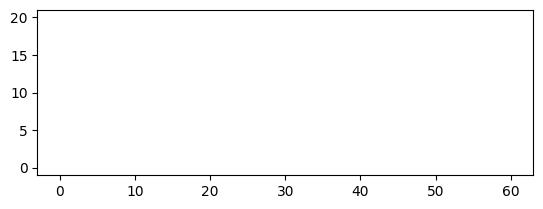

In [65]:
if __name__ == "__main__":
    main(nelx=60, nely=20)
